# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
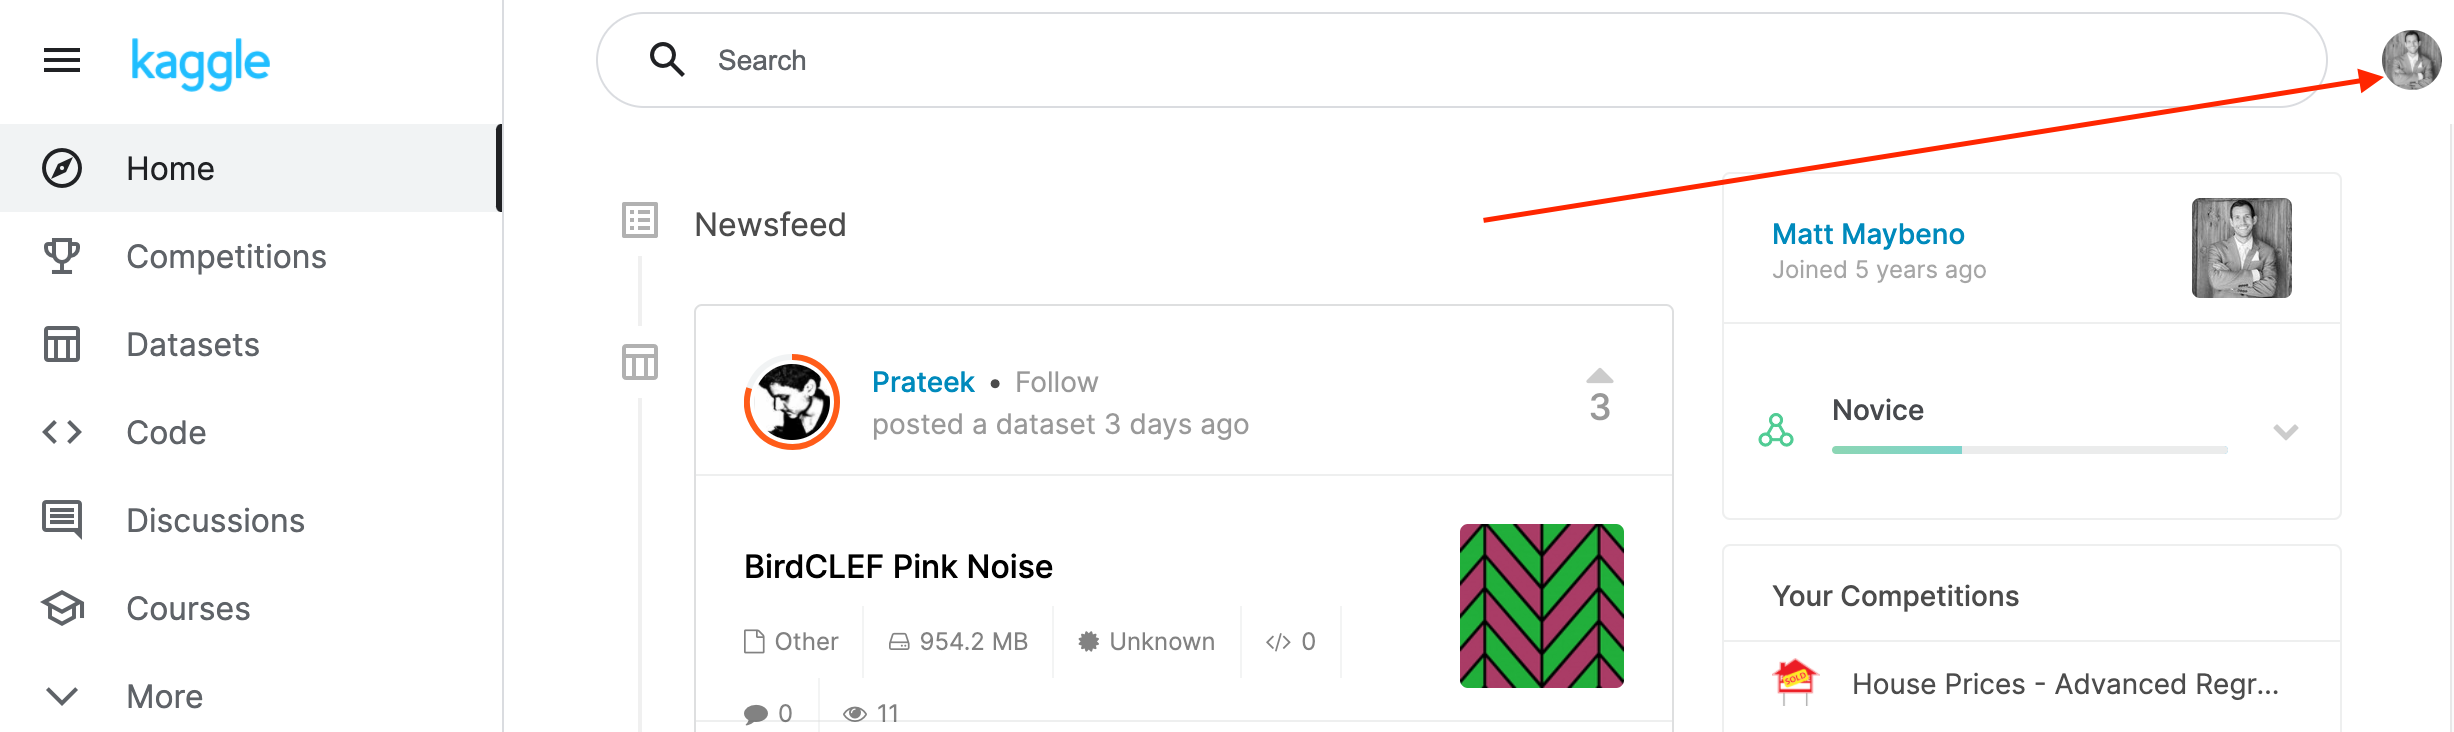
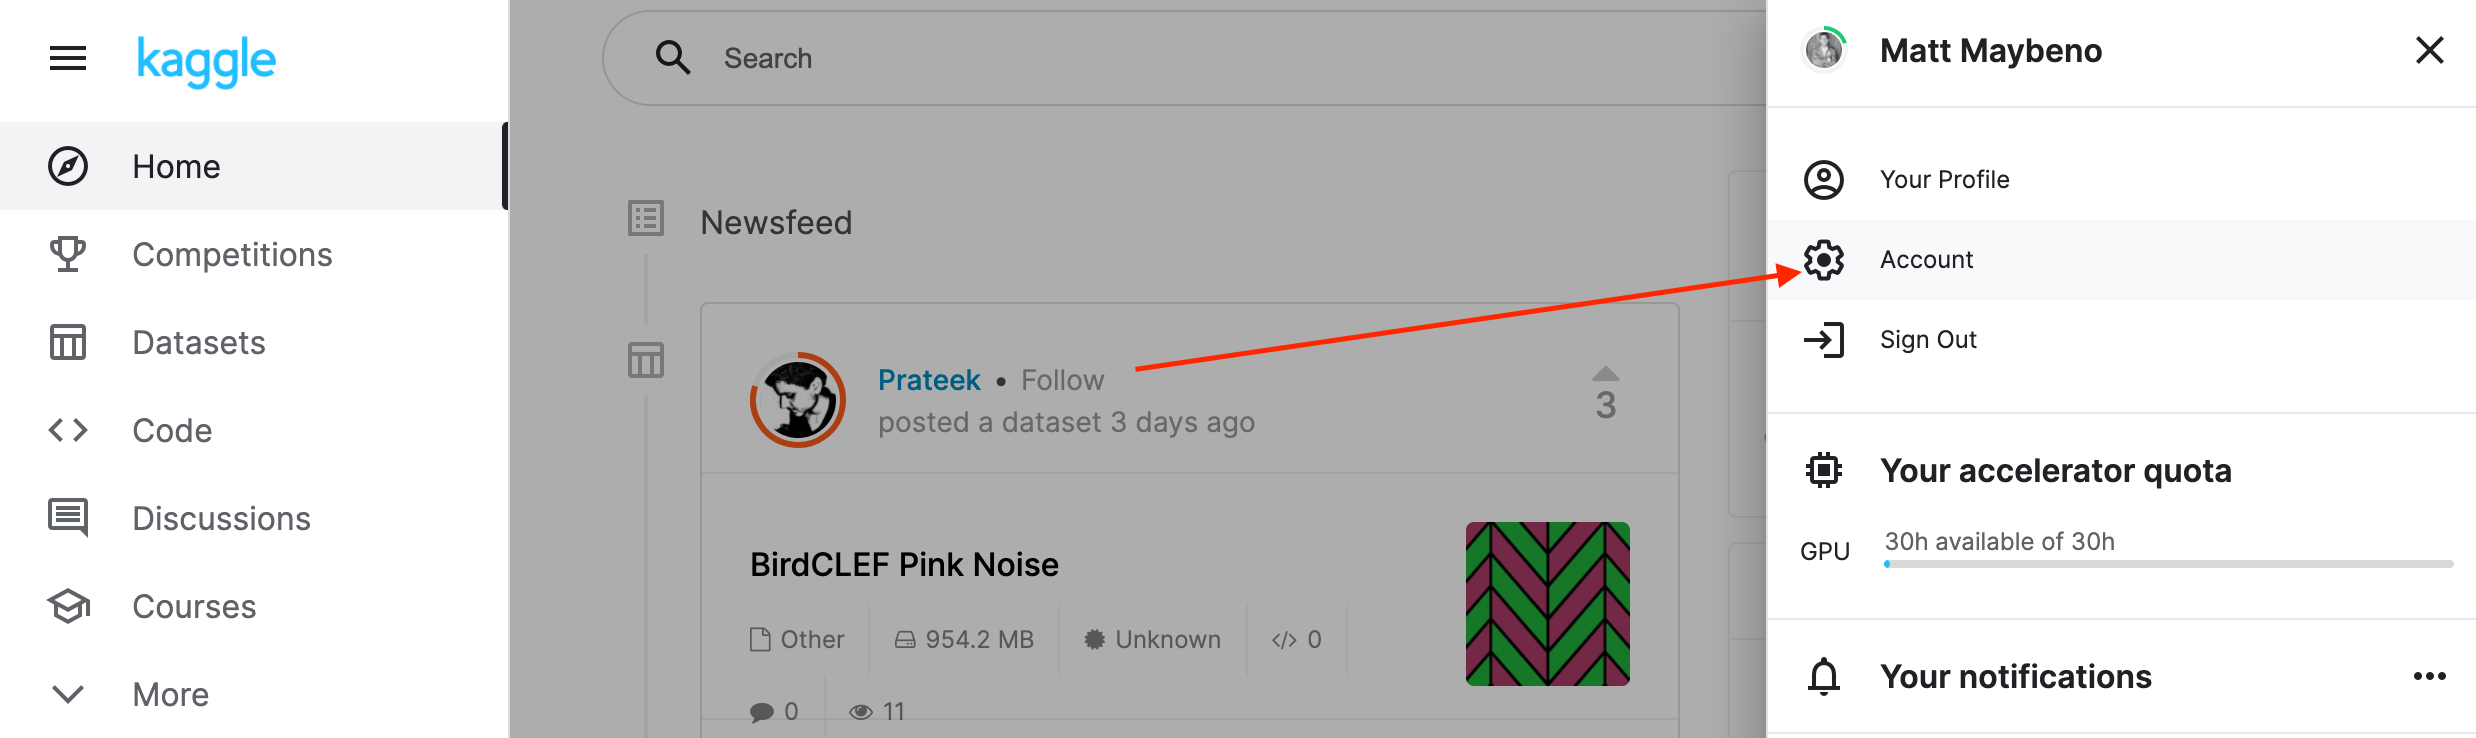
2. Scroll down to API and click Create New API Token.
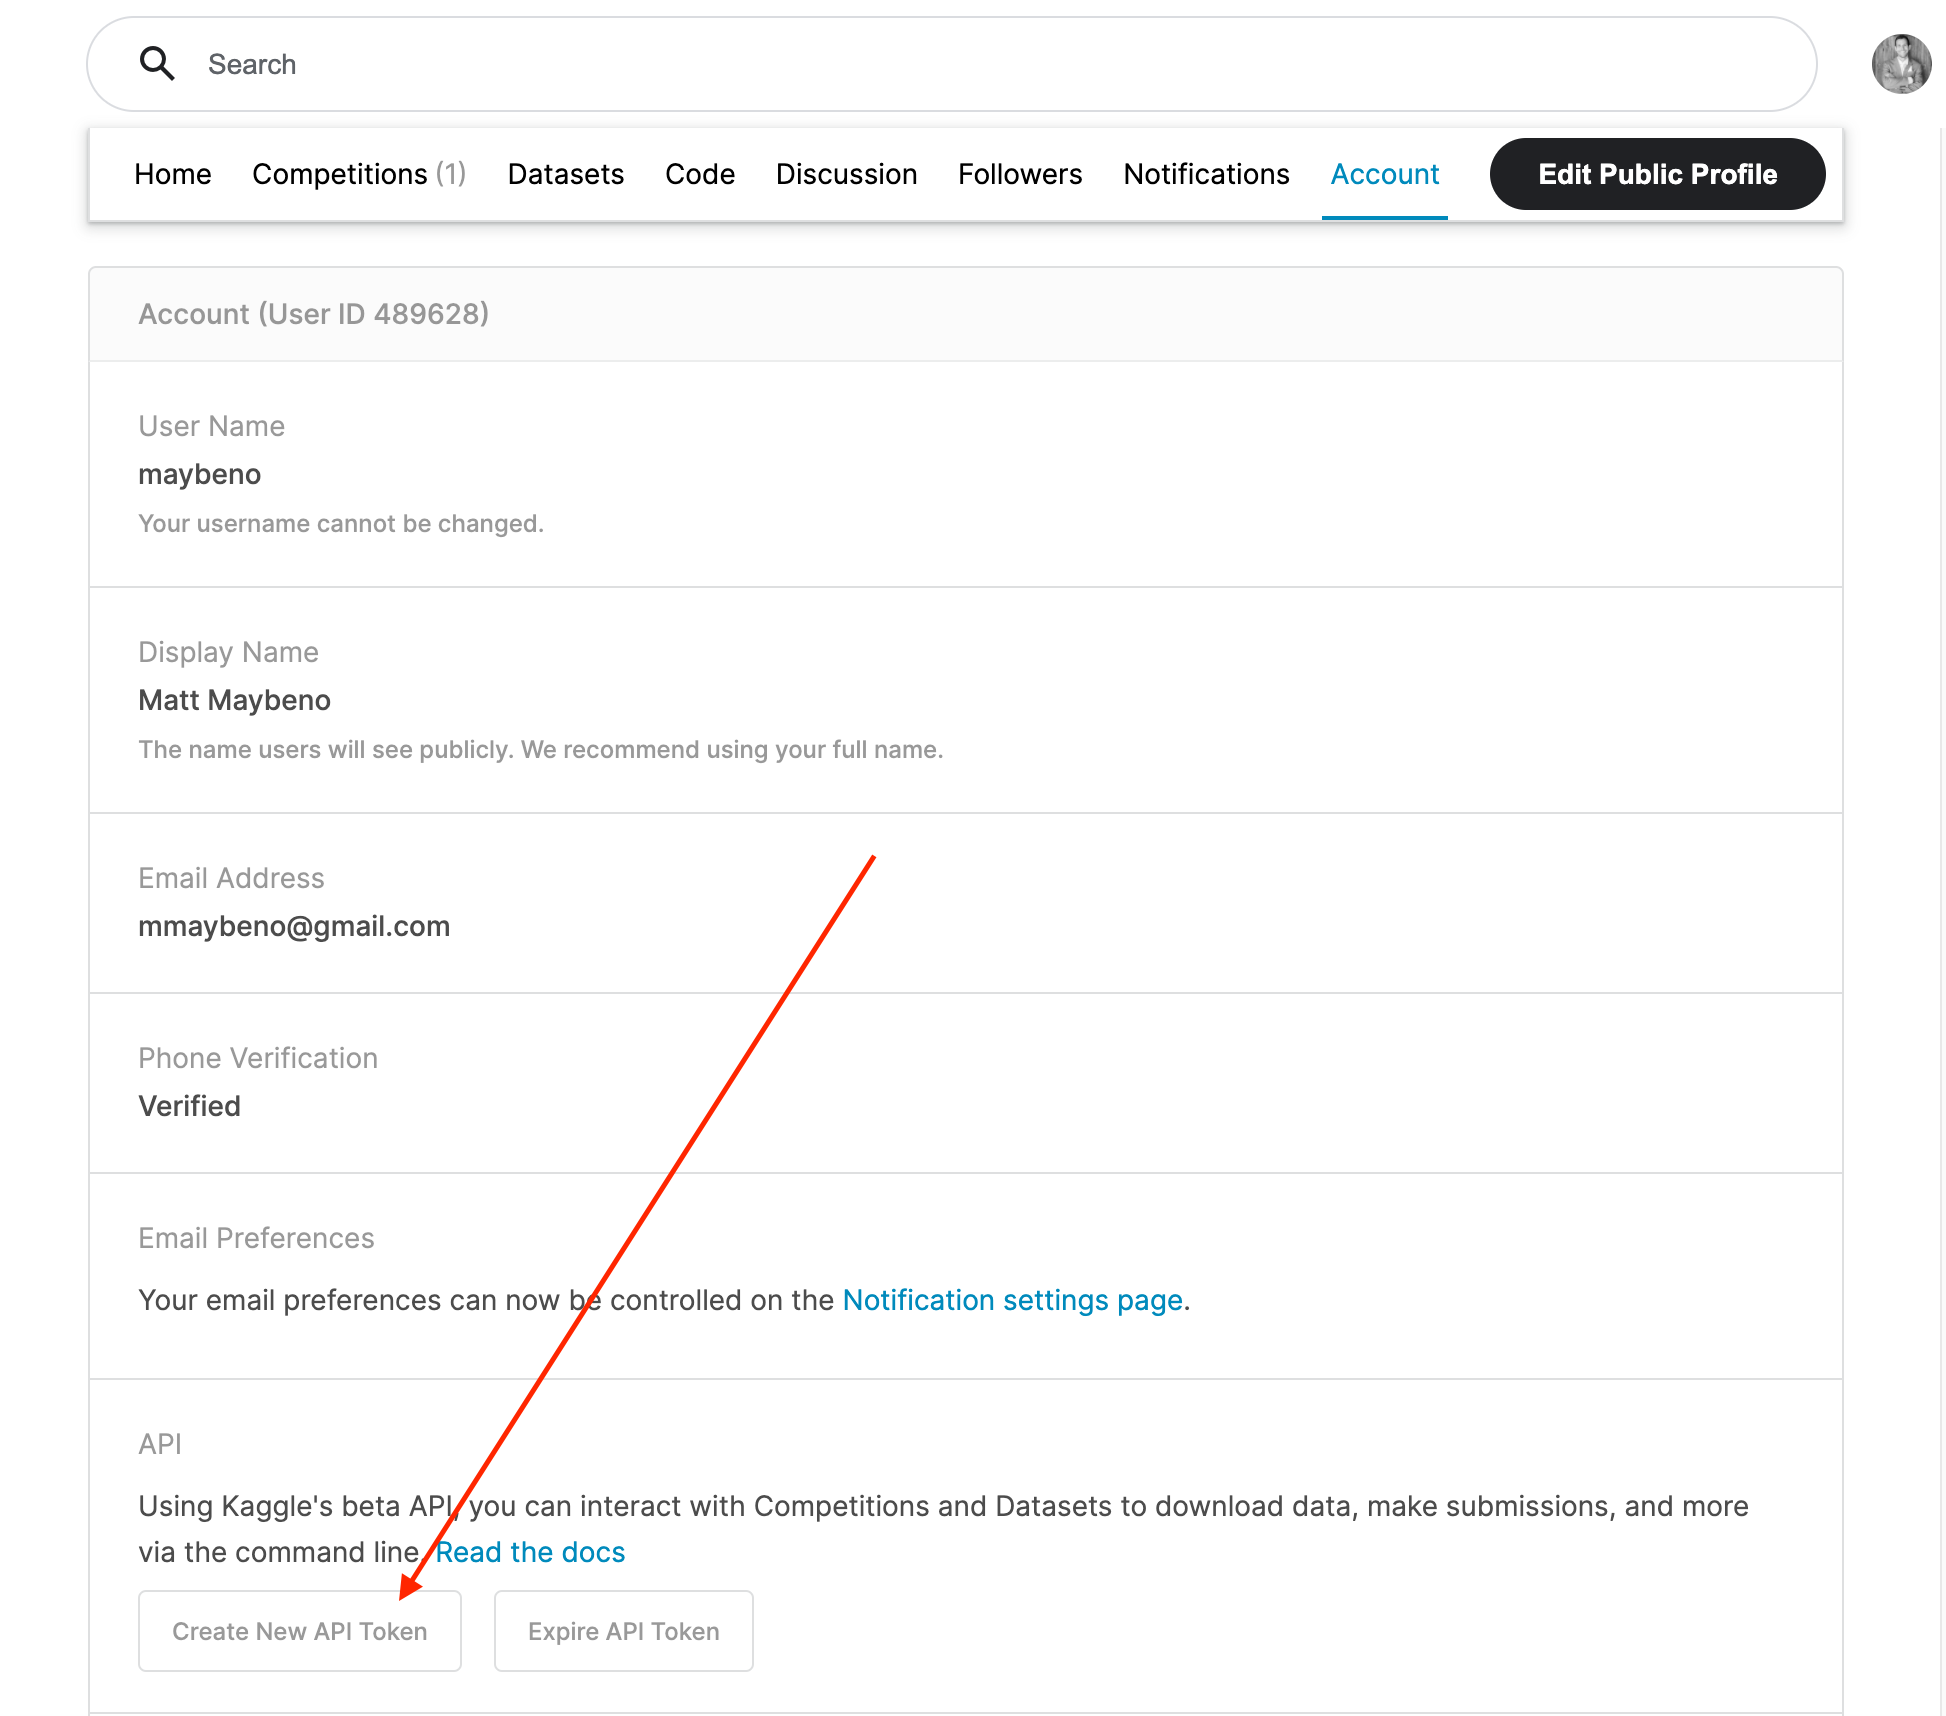
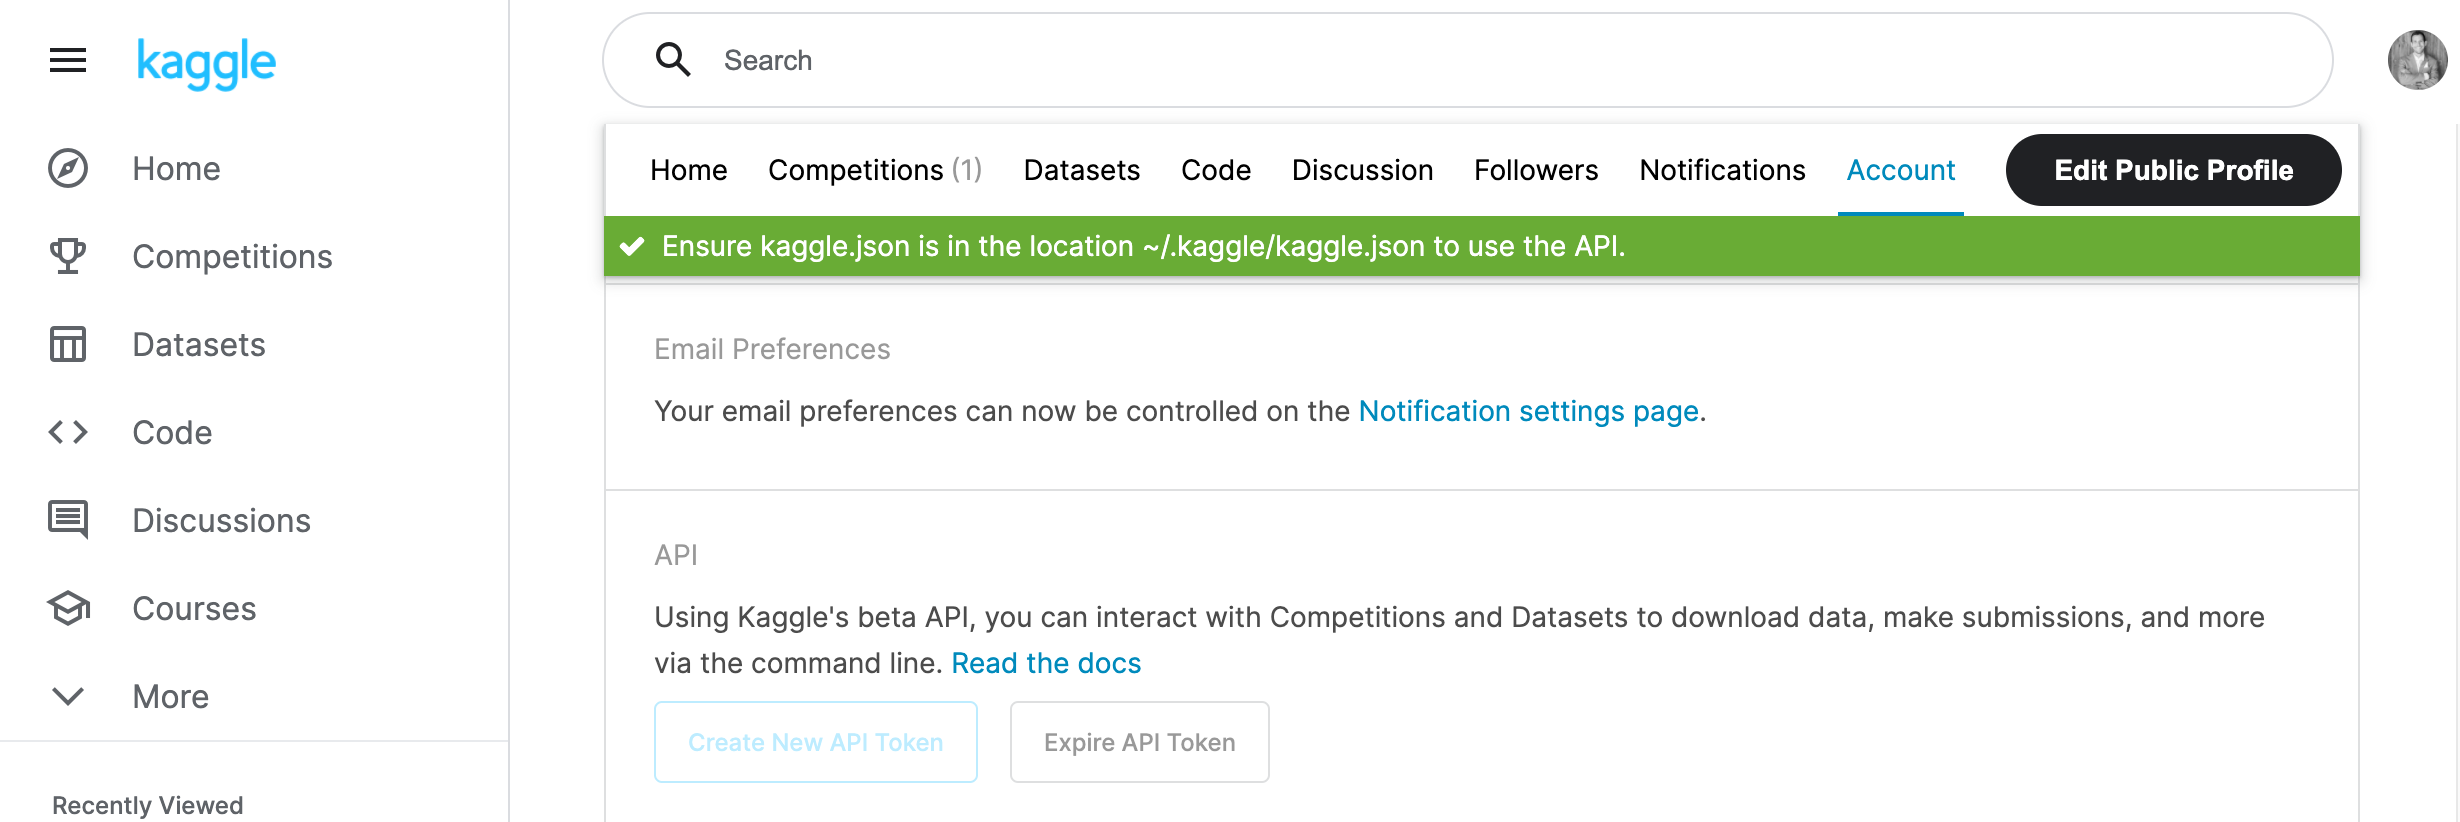
3. Open up `kaggle.json` and use the username and key.
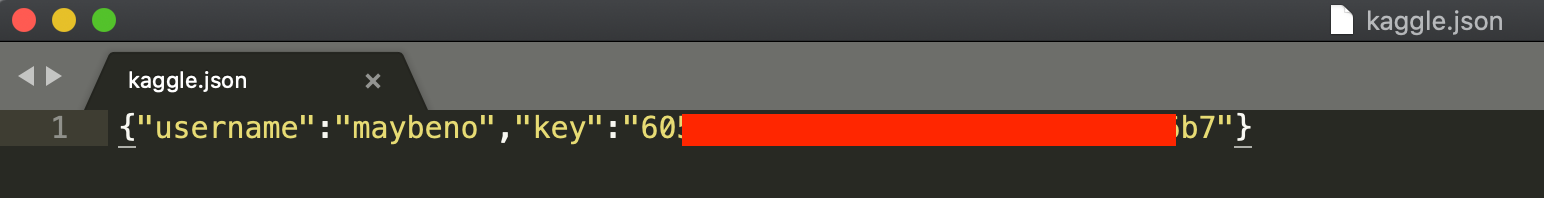

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install autogluon --no-cache-dir
# # Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [2]:
# # create the .kaggle directory and an empty kaggle.json file
# !mkdir -p /root/.kaggle
# !touch /root/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json

In [3]:
# # Fill in your user name and key from creating the kaggle account and API token file
# import json
# kaggle_username = "FILL_IN_USERNAME"
# kaggle_key = "FILL_IN_KEY"

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
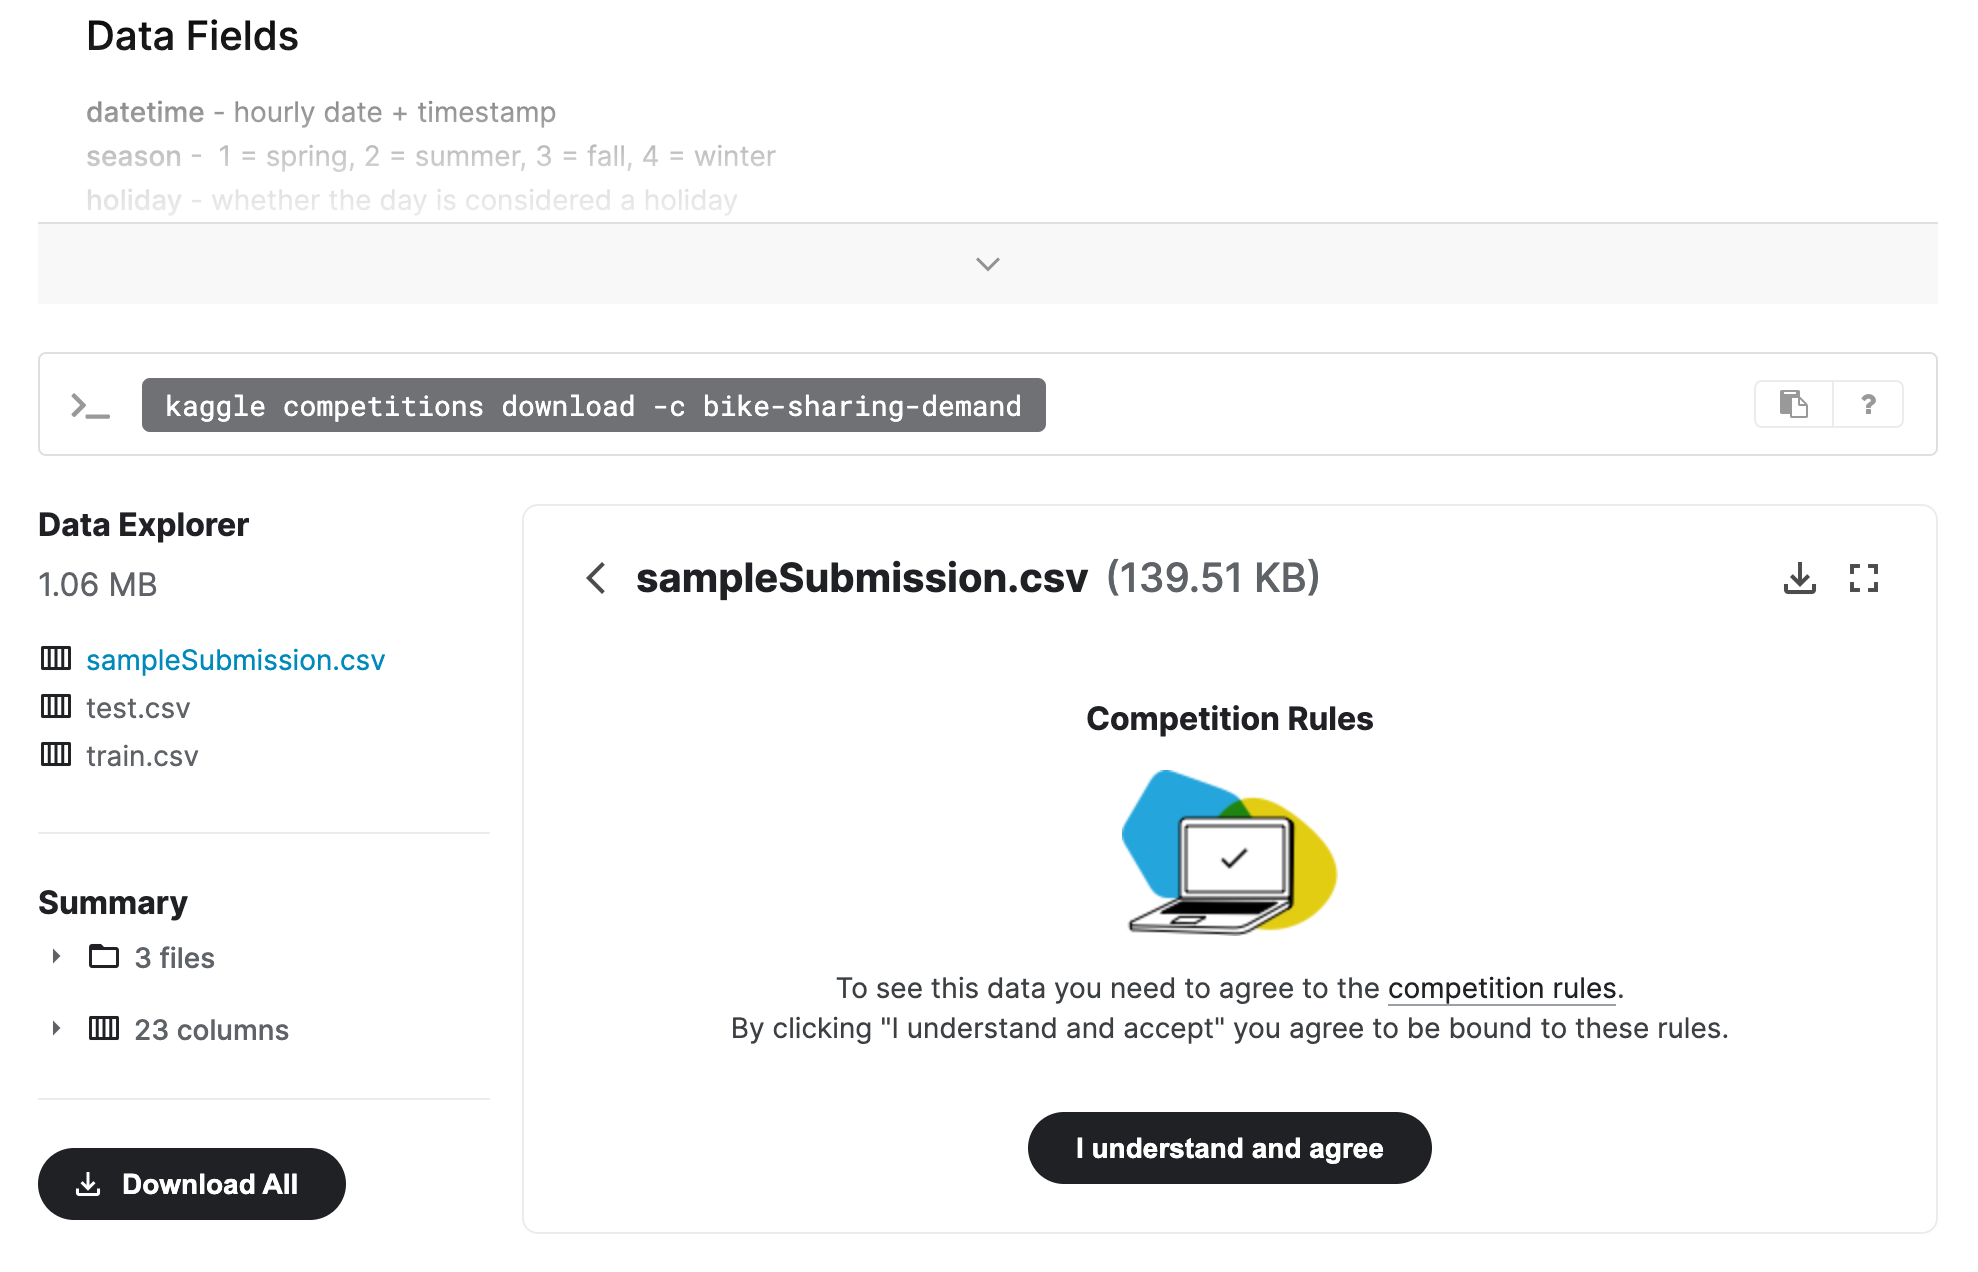

In [4]:
# # Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
# !kaggle competitions download -c bike-sharing-demand
# # If you already downloaded it you can use the -o command to overwrite the file
# !unzip -o bike-sharing-demand.zip

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
import autogluon.core as ag


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('bike-sharing-demand/train.csv',parse_dates =['datetime'])

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('bike-sharing-demand/test.csv',parse_dates =['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
# Same thing as train and test dataset
submission = pd.read_csv('bike-sharing-demand/sampleSubmission.csv',parse_dates =['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [65]:
predictor = TabularPredictor('count',problem_type='regression',learner_kwargs={"ignored_columns":['casual','registered']},
                             eval_metric='root_mean_squared_error').fit(train,time_limit=600,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20230531_013647\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230531_013647\"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7862.13 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
	

	0.19s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 26.22s of the 26.2s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-55.0695	 = Validation score   (-root_mean_squared_error)
	6.94s	 = Training   runtime
	0.23s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 9.98s of remaining time.
	-50.5274	 = Validation score   (-root_mean_squared_error)
	0.48s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 590.54s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20230531_013647\")


### Review AutoGluon's training run with ranking of models that did the best.

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.545607      11.096767  409.280485                0.000000           0.361998            3       True         22
1   NeuralNetFastAI_BAG_L2  -51.716262      10.008647  322.826800                0.270120          22.167076            2       True         18
2   RandomForestMSE_BAG_L2  -53.379886      10.171751  314.397344                0.433223          13.737620            2       True         15
3     ExtraTreesMSE_BAG_L2  -54.303663      10.179574  303.527697                0.441046           2.867972            2       True         17
4           XGBoost_BAG_L2  -54.960386       9.838179  304.831909                0.099651           4.172185            2       True         19
5     LightGBMLarge_BAG_L2  -55.069468      10.038877  305.921805         

C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

### Create predictions from test dataset

In [24]:
best_model_name = predictor.get_model_best()

In [25]:
predictions = predictor.predict(test,model=best_model_name)
predictions.head()

0    24.909117
1    39.908840
2    44.751022
3    48.349266
4    50.776348
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [26]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.896164
std        88.322205
min         0.362242
25%        21.798826
50%        67.599335
75%       168.456116
max       351.272461
Name: count, dtype: float64

In [82]:
# How many negative values do we have?
predictions[predictions<0].count()

0

In [83]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [31]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|4         | 8.00k/195k [01:24<32:49, 97.1B/s]
 94%|#########4| 184k/195k [01:24<00:03, 3.14kB/s]
100%|##########| 195k/195k [01:28<00:00, 2.25kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [35]:
!kaggle competitions submissions -c bike-sharing-demand
#| tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-05-30 05:49:46  first raw submission  complete  1.80425      1.80425       


#### Initial score of 1.80425

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

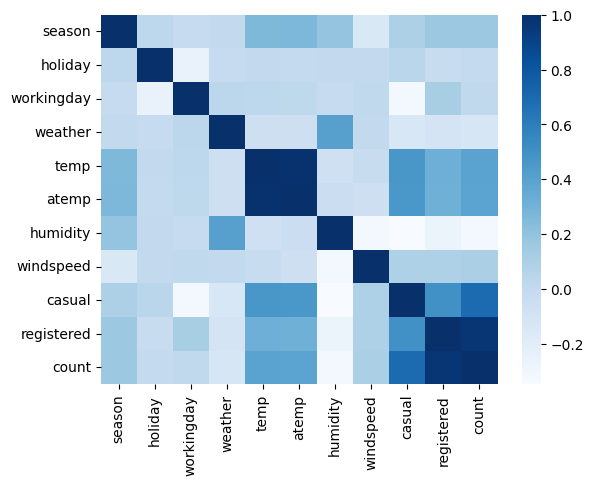

In [125]:
corr=train.corr()
sns.heatmap(corr,  cmap="Blues", annot=False,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

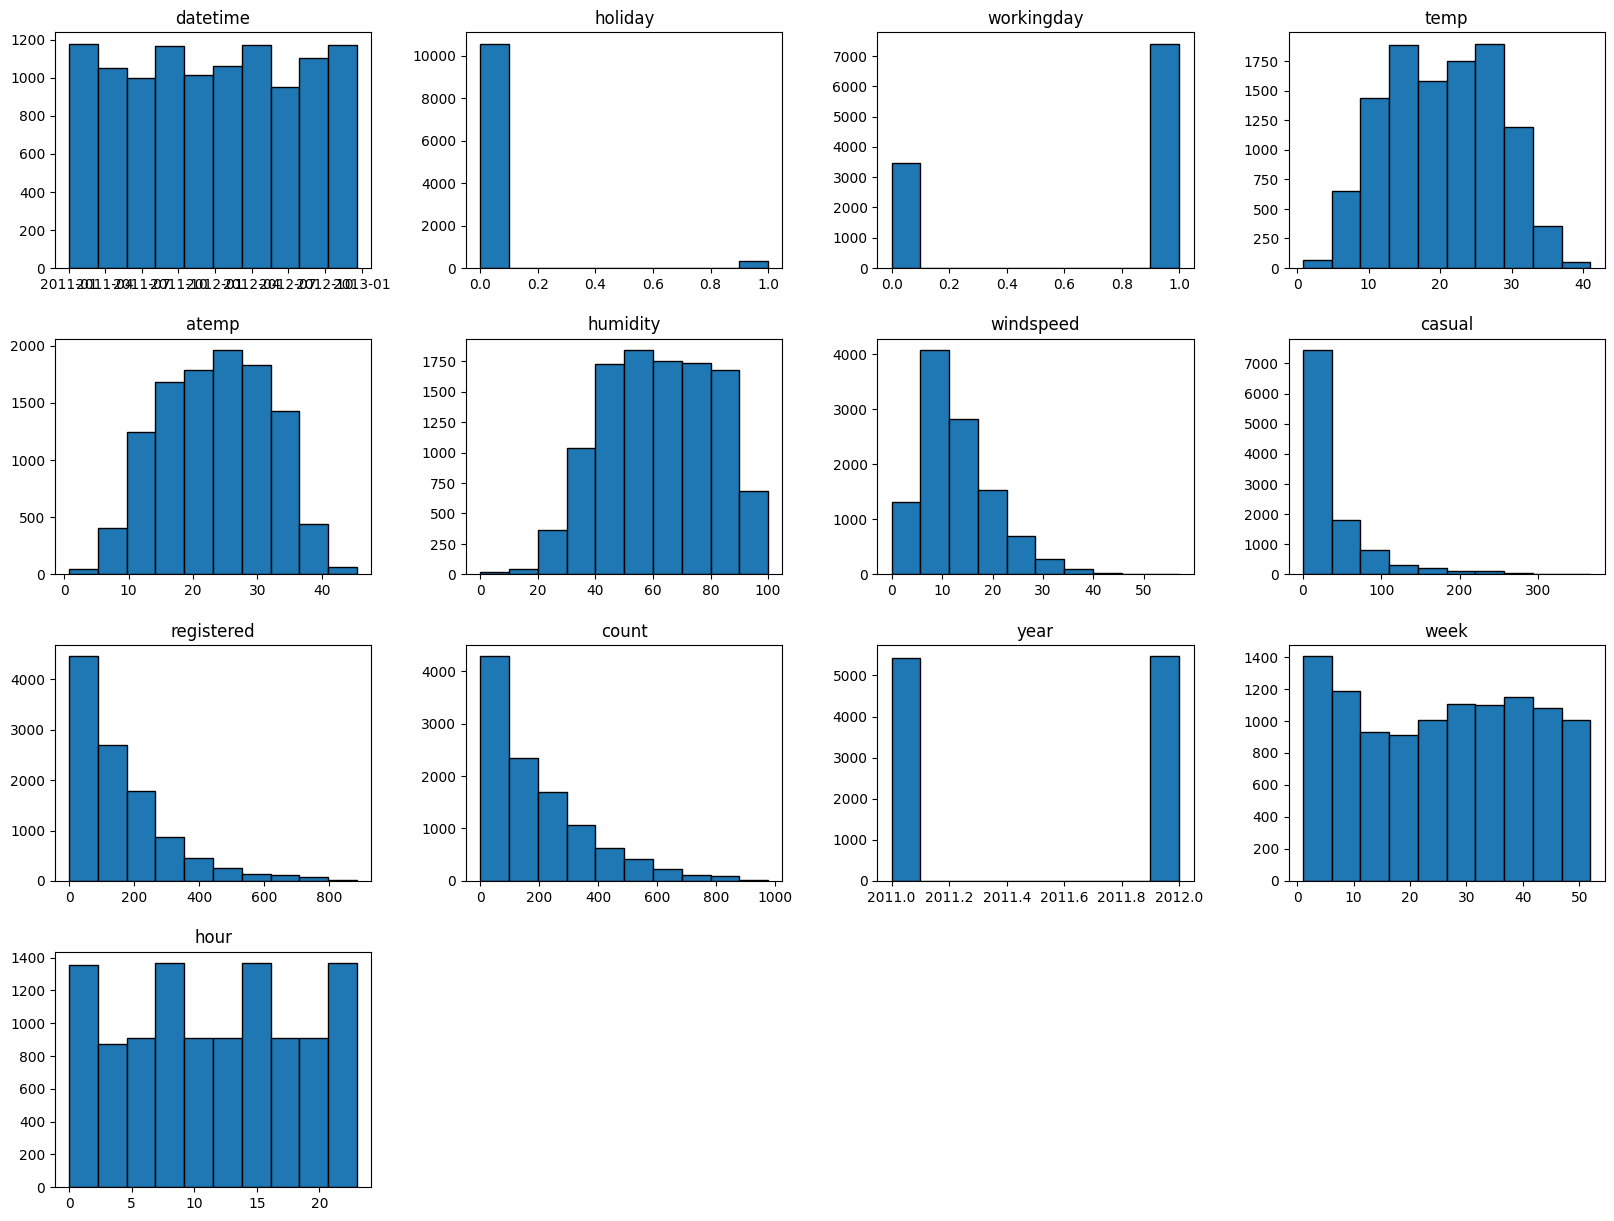

In [69]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
fig,ax=plt.subplots(figsize=[20,15]);
train.hist(edgecolor='black', grid=False,ax=ax);


In [66]:
train.datetime.dt.day_name()

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime, Length: 10886, dtype: object

In [9]:
# create a new feature
train['year'] = train.datetime.dt.year
train['week'] = train.datetime.dt.week
train['hour'] = train.datetime.dt.hour
train['weekday'] = train.datetime.dt.day_name()
test['year'] = test.datetime.dt.year
test['week'] = test.datetime.dt.week
test['hour'] = test.datetime.dt.hour
test['weekday'] = test.datetime.dt.day_name()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [10]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [11]:
train['year'] = train["year"].astype('category')
# train['week'] = train["week"].astype('category')
# train['hour'] = train["hour"].astype('category')
train['weekday'] = train["weekday"].astype('category')
test['year'] = test["year"].astype('category')
# test['week'] = test["week"].astype('category')
# test['hour'] = test["hour"].astype('category')
test['weekday'] = test["weekday"].astype('category')

In [13]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,week,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,52,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,52,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,52,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,52,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,52,4,Saturday


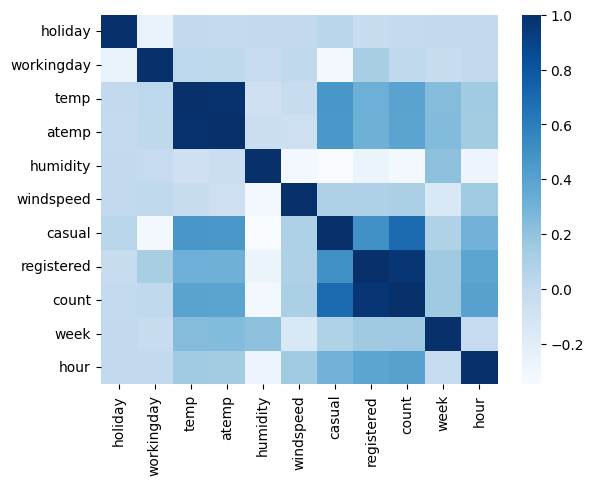

In [130]:
corr=train.corr()
sns.heatmap(corr,  cmap="Blues", annot=False,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

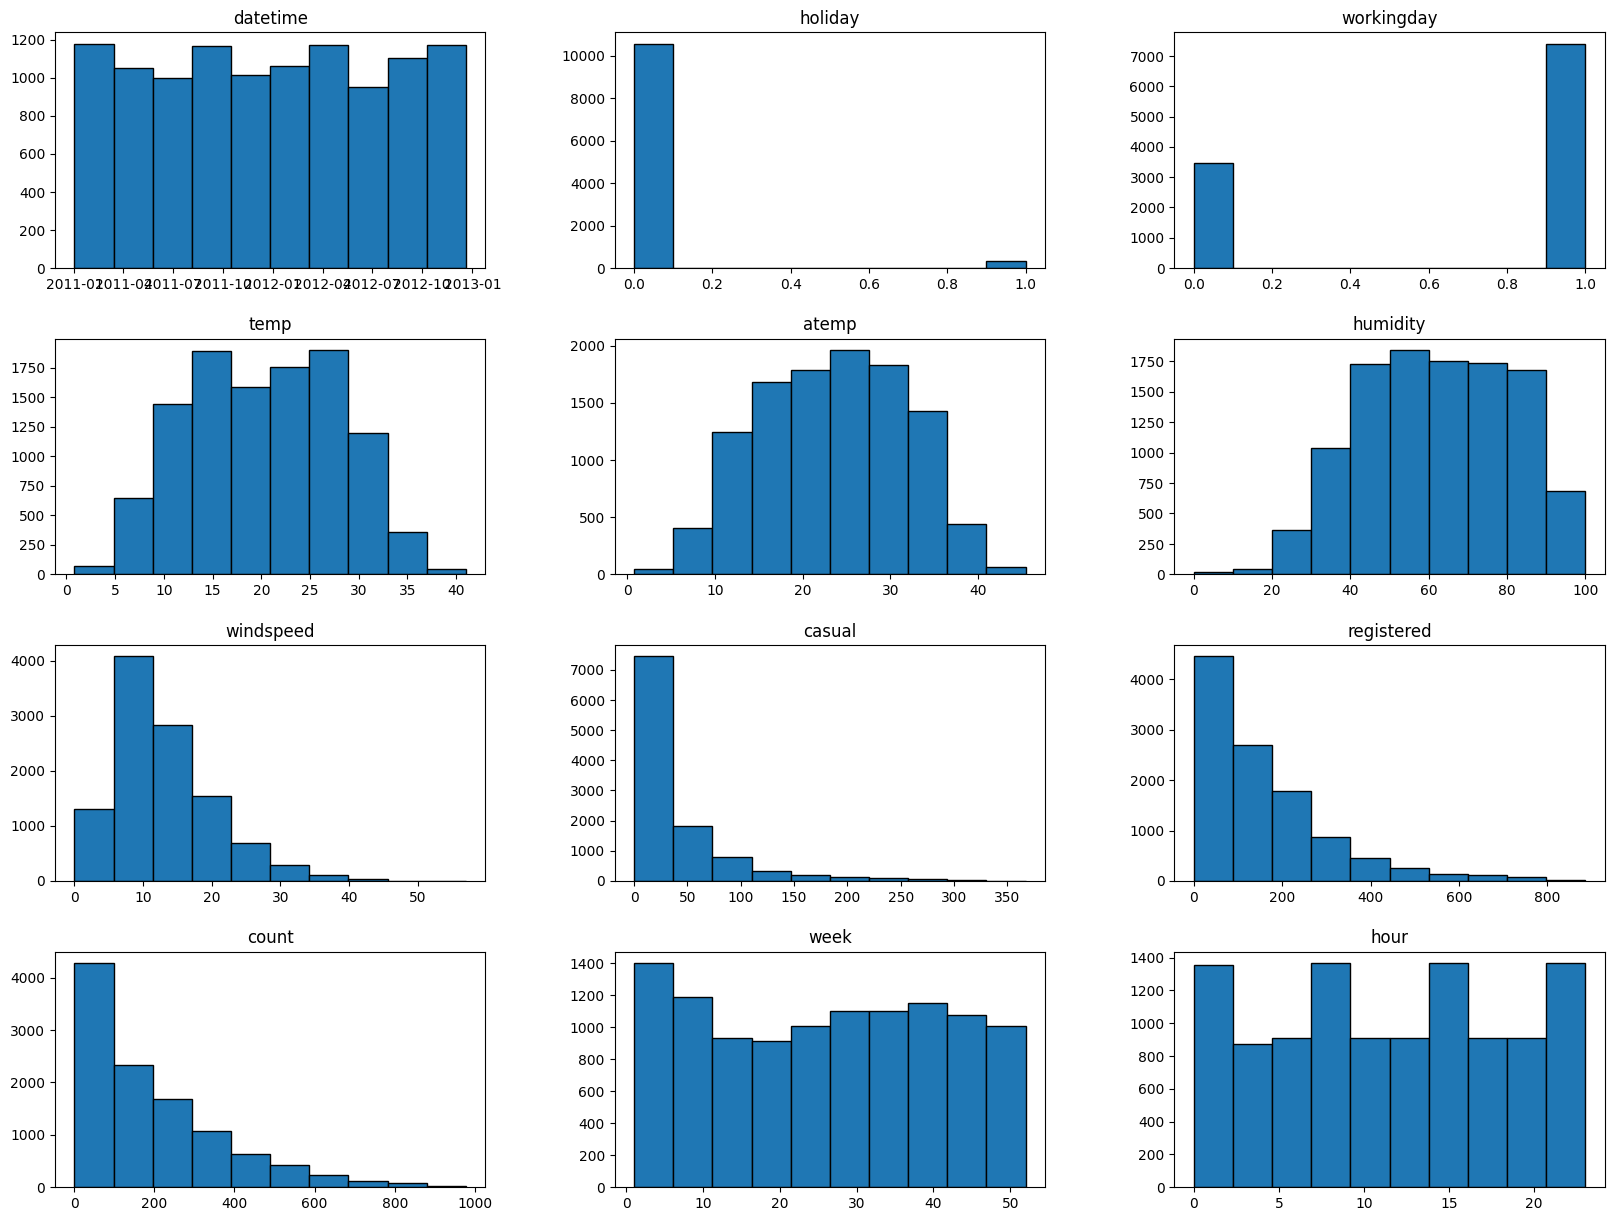

In [14]:
# View histogram of all features again now with the hour feature
fig,ax=plt.subplots(figsize=[20,15]);
train.hist(edgecolor='black', grid=False,ax=ax);

## Step 5: Rerun the model with the same settings as before, just with more features

In [74]:
predictor_new_features = TabularPredictor('count',problem_type='regression',learner_kwargs={"ignored_columns":['casual','registered']},
                             eval_metric='root_mean_squared_error').fit(train,time_limit=600,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20230530_061306\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230530_061306\"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6493.93 MB
	Train Data (Original)  Memory Usage: 1.59 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
	

In [75]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.890078      17.328178  497.813932                0.000000           0.277118            3       True         17
1   NeuralNetFastAI_BAG_L2  -30.300083      17.032513  366.699103                0.309780          18.725494            2       True         16
2          CatBoost_BAG_L2  -30.497057      16.777017  474.781693                0.054284         126.808084            2       True         14
3          LightGBM_BAG_L2  -30.777089      16.964114  352.003236                0.241381           4.029627            2       True         12
4        LightGBMXT_BAG_L2  -31.196428      17.262372  352.911093                0.539639           4.937484            2       True         11
5     ExtraTreesMSE_BAG_L2  -31.690163      17.162664  350.954443         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.588176259

In [77]:
predictions_new_features = predictor_new_features.predict(test,model=predictor_new_features.get_model_best())
predictions_new_features.head()

0    14.893423
1     7.717738
2     6.931653
3     7.115042
4     7.138554
Name: count, dtype: float32

In [78]:
# Remember to set all negative values to zero
predictions_new_features.describe()

count    6493.000000
mean      148.880478
std       124.469337
min        -0.585657
25%        54.533398
50%       119.668686
75%       207.174530
max       785.126709
Name: count, dtype: float64

In [85]:
predictions_new_features[predictions_new_features<0].count()

6

In [86]:
predictions_new_features[predictions_new_features<0]=0

In [90]:
submission_new_features = submission.copy(deep=True)

In [91]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [92]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [01:24<32:47, 97.1B/s]
 95%|#########4| 184k/194k [01:24<00:03, 3.14kB/s]
100%|##########| 194k/194k [01:27<00:00, 2.27kB/s]


In [93]:
!kaggle competitions submissions -c bike-sharing-demand 
#| tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-30 06:32:08  new features          complete  0.70588      0.70588       
submission.csv               2023-05-30 05:49:46  first raw submission  complete  1.80425      1.80425       


#### New Score of 0.70588

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [15]:
time_limit = 10*60  # train various models for 10 mins
num_trials = 10  # try at most 10 different hyperparameter configurations for each type of model
search_strategy = 'auto'  #"bayes", # random # to tune hyperparameters using Bayesian optimization routine with a local scheduler

In [16]:

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : "ASHA", #'local', #
    'searcher': search_strategy,
}

In [18]:
predictor_new_hpo = TabularPredictor('count',problem_type='regression',learner_kwargs={"ignored_columns":['casual','registered']},
                             eval_metric='root_mean_squared_error').fit(train,time_limit=600,presets='best_quality',
                                                                   hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 29.98s of the 235.49s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.8223	 = Validation score   (-root_mean_squared_error)
	8.56s	 = Training   runtime
	0.22s	 = Validation runtime
Repeating k-fold bagging: 2/20
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 222.75s of the 222.74s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.5555	 = Validation score   (-root_mean_squared_error)
	12.48s	 = Training   runtime
	0.44s	 = Validation runtime
Repeating k-fold bagging: 3/20
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 209.52s of the 209.51s of remaining time.
	Fitting 8 child models (S3F1 - S3F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.4301	 = Validation score

In [140]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                             model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              WeightedEnsemble_L2 -32.375607       3.666819  196.446225                0.000000           0.158715            2       True          4
1             LightGBMLarge_BAG_L1 -32.552075       3.557436   34.594732                3.557436          34.594732            1       True          3
2             LightGBMLarge_BAG_L2 -33.362305       7.653478  313.601118                3.721043          71.981003            2       True          5
3              WeightedEnsemble_L3 -33.362305       7.654464  313.603590                0.000986           0.002472            3       True          6
4   NeuralNetTorch_BAG_L1\6349b722 -45.199272       0.109383  161.692777                0.109383         161.692777            1       True          2
5  NeuralNetFastAI_BAG_L1\5aea9d

{'model_types': {'NeuralNetFastAI_BAG_L1\\5aea9def': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1\\6349b722': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetFastAI_BAG_L1\\5aea9def': -46.6282896132067,
  'NeuralNetTorch_BAG_L1\\6349b722': -45.199272049199045,
  'LightGBMLarge_BAG_L1': -32.552074649850724,
  'WeightedEnsemble_L2': -32.37560661696187,
  'LightGBMLarge_BAG_L2': -33.3623048521261,
  'WeightedEnsemble_L3': -33.3623048521261},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetFastAI_BAG_L1\\5aea9def': 'E:\\online competition\\kaggle\\udacity_nd_bike_sharing_project\\cd0385-project-starter\\project\\AutogluonModels\\ag-20230531_004701\\models\\NeuralNetFastAI_BAG_L1\\5aea9def\\',
  'NeuralNetTorch_BAG_L1\

In [20]:
predictions_new_features_hpo = predictor_new_hpo.predict(test,model=predictor_new_hpo.get_model_best())
predictions_new_features_hpo.head()

0    13.315242
1    -1.718998
2    -4.141519
3     0.576120
4     0.718507
Name: count, dtype: float32

In [21]:
# Remember to set all negative values to zero
predictions_new_features_hpo.describe()

count    6493.000000
mean      191.578339
std       172.726730
min        -6.694787
25%        45.578114
50%       150.683228
75%       284.875244
max       876.015808
Name: count, dtype: float64

In [22]:
predictions_new_features_hpo[predictions_new_features_hpo<0].count()

58

In [23]:
predictions_new_features_hpo[predictions_new_features_hpo<0]=0

In [24]:
submission_new_hpo = submission.copy(deep=True)

In [25]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_features_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

Successfully submitted to Bike Sharing Demand


  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [01:24<32:48, 96.9B/s]
 95%|#########4| 184k/194k [01:24<00:03, 3.13kB/s]
100%|##########| 194k/194k [01:26<00:00, 2.29kB/s]


In [27]:
!kaggle competitions submissions -c bike-sharing-demand 
#| tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-31 00:59:18  new features with hyperparameters  complete  0.49844      0.49844       
submission_new_features.csv  2023-05-30 06:32:08  new features                       complete  0.70588      0.70588       
submission.csv               2023-05-30 05:49:46  first raw submission               complete  1.80425      1.80425       


#### New Score of 0.49844       

In [17]:

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-3, 1e-2, default=5e-3, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100],[200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 80,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=10, upper=50, default=20),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                  } 

time_limit = 10*60  # train various models for ~2 min
num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [139]:
predictor_new_hpo1 = TabularPredictor('count',problem_type='regression',learner_kwargs={"ignored_columns":['casual','registered']},
                             eval_metric='root_mean_squared_error').fit(train,time_limit=time_limit,presets='best_quality',
                                                                   hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels\ag-20230531_025623\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230531_025623\"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8304.23 MB
	Train Data (Original)  Memory Usage: 0.83 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
	

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L1\T1 ...
	-48.1213	 = Validation score   (-root_mean_squared_error)
	10.23s	 = Training   runtime
	0.0s	 = Valid

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=31724, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=31724, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 823, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 875, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 830, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 834, in ray._raylet.execute_task
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "C:\Users\Chris\anaconda3\envs\py38_bas

2023-05-31 07:58:25,267	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:58:25,273	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=11948, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=11948, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 823, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 875, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 830, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 834, in ra

2023-05-31 07:58:35,052	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:58:35,057	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:58:35,058	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:58:35,065	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_

2023-05-31 07:58:53,474	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=33764, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=33764, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 823, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 875, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 830, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 834, in ray._raylet.execute_task
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "C:\Users\Chr

2023-05-31 07:59:03,123	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:03,129	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
2023-05-31 07:59:03,146	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:03,149	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-0

2023-05-31 07:59:21,215	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:21,219	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:21,225	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:21,231	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:21,239	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UN

2023-05-31 07:59:39,565	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:39,583	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:39,588	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:39,594	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 07:59:39,598	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UN

	-37.5413	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 2 L2 models ...
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 177.38s of the 394.17s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L2\T1 ...
	-37.2839	 = Validation score   (-root_mean_squared_error)
	11.08s	 = Training   runtime
	0.0s	 = Valid

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=15272, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=15272, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 823, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 875, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 830, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 834, in ray._raylet.execute_task
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "C:\Users\Chris\anaconda3\envs\py38_bas

2023-05-31 08:01:52,475	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=35860, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=35860, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 823, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 875, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 830, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 834, in ray._raylet.execute_task
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "C:\Users\Chr

2023-05-31 08:02:03,312	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:03,327	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:03,333	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:03,338	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:03,343	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UN

2023-05-31 08:02:12,765	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:12,770	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:12,775	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=20268, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=20268, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", l

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=21556, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=21556, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 823, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 875, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 830, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 834, in ray._raylet.execute_task
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "C:\Users\Chris\anaconda3\envs\py38_bas

2023-05-31 08:02:40,925	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:40,929	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=15708, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=15708, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 823, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 875, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 830, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 834, in ray._raylet.execute_task
  File "C:\Users\Chris\anaconda3\envs\py38_base\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y

2023-05-31 08:02:49,869	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:49,885	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:49,885	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:02:49,885	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_

2023-05-31 08:03:07,850	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:03:07,853	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:03:07,857	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:03:07,858	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=10052, ip=127.0.0.1)
ModuleNotFoundError: No module named 'mxnet'

During handling of the above exception, another exception occurred:

ray::_ray_fit() (pid=10052, ip=127.0.0.1)
  File "

2023-05-31 08:03:17,121	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 186.45s of remaining time.
2023-05-31 08:03:17,128	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:03:17,132	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-05-31 08:03:17,137	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more 

In [141]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -36.428313       0.001001  146.086720                0.000000           0.305657            3       True         22
1    LightGBM_BAG_L2\T8  -36.596210       0.001001  122.927084                0.000000          11.239582            2       True         19
2   LightGBM_BAG_L2\T10  -36.717208       0.001001  122.865482                0.000000          11.177980            2       True         21
3    LightGBM_BAG_L2\T7  -36.963696       0.001001  122.702333                0.000000          11.014831            2       True         18
4    LightGBM_BAG_L2\T2  -36.971947       0.001001  123.363501                0.000000          11.675999            2       True         13
5    LightGBM_BAG_L2\T3  -37.012459       0.001001  123.246503                0.000000      

{'model_types': {'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T9': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T10': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T8': 'Stacker

In [142]:
predictions_new_features_hpo1 = predictor_new_hpo1.predict(test,model=predictor_new_hpo1.get_model_best())
predictions_new_features_hpo1.describe()

count    6493.000000
mean      190.777222
std       174.822235
min         4.802301
25%        46.602318
50%       148.788101
75%       284.207275
max       875.185486
Name: count, dtype: float64

In [143]:
predictions_new_features_hpo1[predictions_new_features_hpo1<0].count()

0

In [144]:
predictions_new_features_hpo1[predictions_new_features_hpo1<0]=0

In [145]:
submission_new_hpo1 = submission.copy(deep=True)

In [146]:
# Same submitting predictions
submission_new_hpo1["count"] = predictions_new_features_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [147]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters1"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:05, 37.0kB/s]
 95%|#########4| 184k/194k [00:00<00:00, 726kB/s]  
100%|##########| 194k/194k [00:04<00:00, 41.4kB/s]


In [148]:
!kaggle competitions submissions -c bike-sharing-demand 
#| tail -n +1 | head -n 6

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2023-05-31 03:08:31  new features with hyperparameters1  complete  0.46803      0.46803       
submission_new_hpo.csv       2023-05-31 01:32:59                                      complete  0.49844      0.49844       
submission_new_hpo.csv       2023-05-31 00:59:18  new features with hyperparameters   complete  0.49844      0.49844       
submission_new_features.csv  2023-05-30 06:32:08  new features                        complete  0.70588      0.70588       
submission.csv               2023-05-30 05:49:46  first raw submission                complete  1.80425      1.80425       


#### New Score of 0.46803       

In [12]:

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': ag.space.Int(lower=8, upper=20, default=10),  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-3, 1e-2, default=5e-3, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100],[1000],[200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 80,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=10, upper=50, default=20),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                  } 

time_limit = 10*60  # train various models for ~2 min
num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [13]:
predictor_new_hpo2 = TabularPredictor('count',problem_type='regression',learner_kwargs={"ignored_columns":['casual','registered']},
                             eval_metric='root_mean_squared_error').fit(train,time_limit=time_limit,presets='best_quality',
                                                               hyperparameters=hyperparameters,
                                                               hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels\ag-20230531_043337\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230531_043337\"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6915.38 MB
	Train Data (Original)  Memory Usage: 0.83 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
	

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L1\T1 ...
	-48.1213	 = Validation score   (-root_mean_squared_error)
	16.37s	 = Training   runtime
	0.0s	 = Valid

	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T4 ... Training model for up to 249.14s of the 449.19s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with ParallelLocalFoldFittingStrategy
	-140.404	 = Validation score   (-root_mean_squared_error)
	12.44s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T5 ... Training model for up to 238.41s of the 438.45s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with ParallelLocalFoldFittingStrategy
	-51.9554	 = Validation score   (-root_mean_squared_error)
	12.65s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T6 ... Training model for up to 227.63s of the 427.68s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with ParallelLocalFoldFittingStrategy
	-123.3835	 = Validation score   (-root_mean_squared_error)
	12.65s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T7 ... Train

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2\T1 ...
	-36.4404	 = Validation score   (-root_mean_squared_error)
	11.3

In [14]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -35.774051       1.772058  181.241197                0.000999           0.263998            3       True         22
1   LightGBM_BAG_L2\T10  -35.981921       1.771059  158.507892                0.001000          11.113278            2       True         21
2    LightGBM_BAG_L2\T8  -36.060335       1.770059  158.524888                0.000000          11.130274            2       True         19
3    LightGBM_BAG_L2\T2  -36.171994       1.770059  158.733648                0.000000          11.339034            2       True         13
4    LightGBM_BAG_L2\T7  -36.286430       1.770059  158.686630                0.000000          11.292016            2       True         18
5    LightGBM_BAG_L2\T3  -36.406820       1.770059  158.835299                0.000000      

{'model_types': {'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T9': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T10': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T8': 'Stacker

In [15]:
predictions_new_features_hpo2 = predictor_new_hpo2.predict(test,model=predictor_new_hpo2.get_model_best())
predictions_new_features_hpo2.head()

0    10.651279
1     6.327431
2     6.279728
3     6.315984
4     6.302880
Name: count, dtype: float32

In [16]:
# Remember to set all negative values to zero
predictions_new_features_hpo2.describe()

count    6493.000000
mean      190.663055
std       174.672501
min         5.210919
25%        43.650482
50%       148.237976
75%       283.945831
max       877.211304
Name: count, dtype: float64

In [17]:
predictions_new_features_hpo2[predictions_new_features_hpo2<0].count()

0

In [18]:
predictions_new_features_hpo2[predictions_new_features_hpo2<0]=0

In [19]:
submission_new_hpo2 = submission.copy(deep=True)

In [20]:
# Same submitting predictions
submission_new_hpo2["count"] = predictions_new_features_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters2"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:05, 32.1kB/s]
 95%|#########4| 184k/194k [00:00<00:00, 628kB/s]  
100%|##########| 194k/194k [00:04<00:00, 40.8kB/s]


In [24]:
!kaggle competitions submissions -c bike-sharing-demand 
#| tail -n +1 | head -n 6

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2023-05-31 04:42:10  new features with hyperparameters2  complete  0.46765      0.46765       
submission_new_hpo1.csv      2023-05-31 03:08:31  new features with hyperparameters1  complete  0.46803      0.46803       
submission_new_hpo.csv       2023-05-31 01:32:59                                      complete  0.49844      0.49844       
submission_new_hpo.csv       2023-05-31 00:59:18  new features with hyperparameters   complete  0.49844      0.49844       
submission_new_features.csv  2023-05-30 06:32:08  new features                        complete  0.70588      0.70588       
submission.csv               2023-05-30 05:49:46  first raw submission                complete  1.80425      1.80425       


#### New Score of 0.46765   

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [30]:
baseline_leaderboard=predictor.leaderboard()
newfeatures_leaderboard=predictor_new_features.leaderboard()
hpo_leaderboard1=predictor_new_hpo.leaderboard()
hpo_leaderboard2=predictor_new_hpo1.leaderboard()
hpo_leaderboard3=predictor_new_hpo2.leaderboard()

                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -35.774051       1.772058  181.241197                0.000999           0.263998            3       True         22
1   LightGBM_BAG_L2\T10  -35.981921       1.771059  158.507892                0.001000          11.113278            2       True         21
2    LightGBM_BAG_L2\T8  -36.060335       1.770059  158.524888                0.000000          11.130274            2       True         19
3    LightGBM_BAG_L2\T2  -36.171994       1.770059  158.733648                0.000000          11.339034            2       True         13
4    LightGBM_BAG_L2\T7  -36.286430       1.770059  158.686630                0.000000          11.292016            2       True         18
5    LightGBM_BAG_L2\T3  -36.406820       1.770059  158.835299                0.000000          11.440685            2       True         14
6    LightGBM

In [32]:
baseline_model_score = abs(baseline_leaderboard['score_val'][0]) #50.545607#
newfeatures_model_score = abs(newfeatures_leaderboard['score_val'][0]) #29.890078#
hpo_model_score1 = abs(hpo_leaderboard1['score_val'][0]) #32.375607#
hpo_model_score2 = abs(hpo_leaderboard2['score_val'][0]) #36.428313#
hpo_model_score3 = abs(hpo_leaderboard3['score_val'][0]) #35.774051#

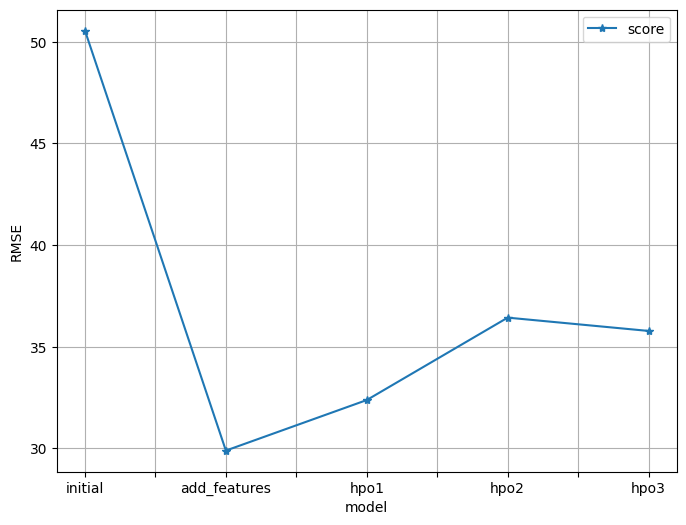

In [43]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo1","hpo2","hpo3"],
        "score": [baseline_model_score,newfeatures_model_score,hpo_model_score1,hpo_model_score2,hpo_model_score3]
    }
).plot(x="model", y="score",  ylabel= 'RMSE', style='-*', grid=True, figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

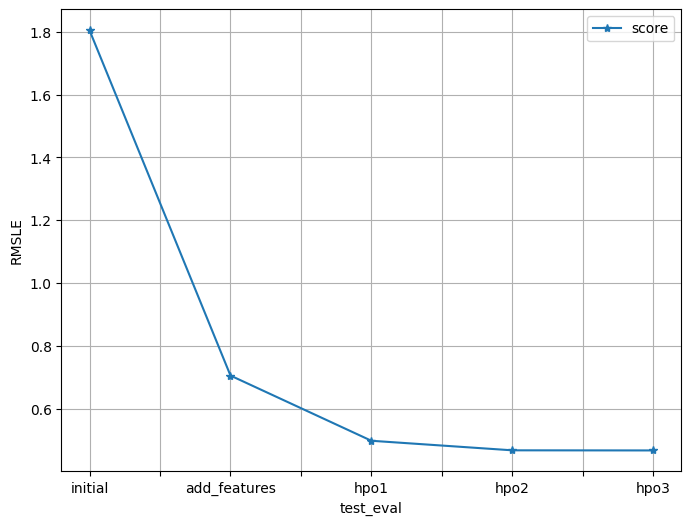

In [42]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo1","hpo2","hpo3"],
        "score": [1.80425, 0.70588, 0.49844, 0.46803, 0.46765]
    }
).plot(x="test_eval", y="score", ylabel= 'RMSLE',style='-*',grid=True,figsize=(8, 6)).get_figure()

fig.savefig('img/model_test_score.png')

### Hyperparameter table

In [39]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo","hpo1","hpo2"],
    "hpo1": ['default', 'default', 'auto',
             "GBM: num_boost_round=80, num_leaves(lower=10, upper=50, default=20)",
             "GBM: num_boost_round=80, num_leaves(lower=10, upper=50, default=20)"],
    "hpo2": ['default', 'default', 'auto',
             "NN_TORCH: num_epochs=10, learning_rate(1e-3, 1e-2, default=5e-3, log=True),activation('relu', 'softrelu', 'tanh'),layers([100],[200, 100])",
             "NN_TORCH: num_epochs(lower=8, upper=20, default=10), learning_rate(1e-3, 1e-2, default=5e-3, log=True),activation('relu', 'softrelu', 'tanh'),layers([100],[1000],[200, 100])"],
    "scheduler": ['default', 'default', 'ASHA','local','local'],
    "trial_time(seconds)": [600, 600,600,600,600],
    "score": [1.80425, 0.70588, 0.49844, 0.46803, 0.46765]
})

,model,hpo1,hpo2,scheduler,trial_time(seconds),score
0,initial,default,default,default,600,1.80425
1,add_features,default,default,default,600,0.70588
2,hpo,auto,auto,ASHA,600,0.49844
3,hpo1,"GBM: num_boost_round=80, num_leaves(lower=10, ...","NN_TORCH: num_epochs=10, learning_rate(1e-3, 1...",local,600,0.46803
4,hpo2,"GBM: num_boost_round=80, num_leaves(lower=10, ...","NN_TORCH: num_epochs(lower=8, upper=20, defaul...",local,600,0.46765


# Report: Predict Bike Sharing Demand with AutoGluon Solution
#### Noman Arshad

## Initial Training
### What did you realize when you tried to submit your predictions? What changes were needed to the output of the predictor to submit your results?
The output column (count - number of total rentals) should not be less than 0 as count can not be negative. So before submiting predictions we need to make sure that our predictions does not contain any negative value in predicted count.

### What was the top ranked model that performed?
WeightedEnsemble_L2 with feature engineering and Hyper parameter optimization.

## Exploratory data analysis and feature creation
### What did the exploratory analysis find and how did you add additional features?
I checked correlation matrix of train df and found that initialy most correlated column was temp and realized that temp is not constant for every hour in a day and also for every week might have different avg temp. So I created some additional columns based on datetime provided to fetch hour of day, week of year, weekday etc. and it really helped in improving model performance.

### How much better did your model preform after adding additional features and why do you think that is?
Model improved significantly after adding new features. I think it is due to the quality of feature. By adding creating highly correlated feature it helps model to learn better and find better decision boundary.

## Hyper parameter tuning
### How much better did your model preform after trying different hyper parameters?
Model performance improved with hyper parameter optimization but not that much as it improved by adding new features. From score table you can see by adding new features it improved significantly from 1.8 RMSLE to 0.7, and after HPO it improved by 0.2 RMSLE further.

### If you were given more time with this dataset, where do you think you would spend more time?
I would like to spend more time on feature engineering to create new useful features that help model to learn decision boundary for better accuracy. With this I would also like to play with hyperparameters.

### Create a table with the models you ran, the hyperparameters modified, and the kaggle score.
|model|hpo1|hpo2|scheduler|trial_time (seconds)|score|
|--|--|--|--|--|--|
|initial|default|default|default|600|1.80425|
|add_features|default|default|default|600|0.70588|
|hpo|auto|auto|ASHA|600|0.49844|
|hpo1|GBM: num_boost_round=80, num_leaves(lower=10, upper=50, default=20)|NN_TORCH: num_epochs=10, learning_rate(1e-3, 1e-2, default=5e-3, log=True),activation('relu', 'softrelu', 'tanh'),layers([100],[200, 100])|local|600|0.46803|
|hpo2|GBM: num_boost_round=80, num_leaves(lower=10, upper=50, default=20)|NN_TORCH: num_epochs(lower=8, upper=20, default=10), learning_rate(1e-3, 1e-2, default=5e-3, log=True),activation('relu', 'softrelu', 'tanh'),layers([100],[1000],[200, 100])|local|600|0.46803|

### Create a line plot showing the top model score for the three (or more) training runs during the project.

![model_train_score.png](img/model_train_score.png)

### Create a line plot showing the top kaggle score for the three (or more) prediction submissions during the project.

![model_test_score.png](img/model_test_score.png)

## Summary
We can improve model performance by spending time on EDA and feature engineering. With better features we can train better models. After training model on data we can then fine tune model by playing with its hyper parameters.

# References:
* https://auto.gluon.ai/dev/tutorials/multimodal/advanced_topics/hyperparameter_optimization.html
* https://docs.aws.amazon.com/sagemaker/latest/dg/autogluon-tabular-hyperparameters.html